# Complex Numbers
In this notebook we are going to learn about complex numbers and how to work with them in `python`. 
We use the same `numpy` library which can handlwe complex numbers as well as real numbers. 

In [3]:
import numpy as np 

a = -1
b = 2.3
z = 2 + 3j

# type of a variable 
print(type(a))
print(type(b))
print(type(z))

# real and imaginary parts 
print(np.real(z))
print(np.imag(z))

<class 'int'>
<class 'float'>
<class 'complex'>
2.0
3.0


## Conjugation

The conjugate of a complex number $z = x + iy$ is denoted by $z^*$ or $\overline{z}$ and is obtained by replacing $i$ with $-i$. 

$$
z = x + iy \quad \rightarrow \quad z^* = x - iy 
$$

In [4]:
# conjugation
print(z)
print(np.conjugate(z))

(2+3j)
(2-3j)


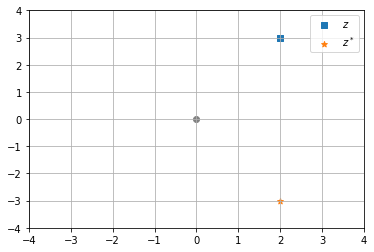

In [5]:
# plot the conjugates 
import matplotlib.pyplot as plt

# make figure
fig = plt.figure()

# get the axes
ax = plt.axes()

# here we use "scatter" to plot individual points on the 2D plane
ax.scatter(0, 0, marker='o', color='gray')
ax.scatter(np.real(z), np.imag(z), marker='s', label="$z$")
ax.scatter(np.real(np.conjugate(z)), np.imag(np.conjugate(z)), marker='*', label="$z^*$")

# fix the axis limit
ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])

# show the grid lines 
ax.grid()

# show the labels 
ax.legend()

# show the plot 
plt.show()

## Absolute value (norm) and angle 

<img src="fig/complex-conjugate.png" alt="complex conjugate" width="200"/>

The absolute value of a complex number $z = x + iy $ is obtained as 

$$
r = |z| = \sqrt{x^2 + y^2}
$$

Another way to think about norm is through the definition $|z| = \sqrt{z z^*}$ where 

$$
z z^* = (x + iy)(x - iy) = x^2 - i xy + i yx + y^2 = x^2 + y^2. 
$$

Every complex number $z$ has a specific angle $\varphi$ assigned to it which is between the $x$ axis and the line crossing $z$ and the origin as the figure shows. 



In [6]:
# multiplication 
print(np.sqrt(np.conjugate(z)*z))

# norm / absolute value 
print(np.sqrt(2.0*2.0 + 3*3))
print(np.absolute(z))

(3.605551275463989+0j)
3.605551275463989
3.605551275463989


In [7]:
# in radians 
print(np.angle(z)) 
# in angles 
print(np.angle(z, deg=True))

0.982793723247329
56.309932474020215


## Exercise: Mandelbrot set


<img src="fig/mandelbrot.jpg" alt="Mandelbrot" width="400"/>

The [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set) is a set of complex numbers $c$ for which the function $f_c(z) = z^2 + c$ does not diverges when iterated, that is, the sequence $f_c(z), f_c(f_c(z)), ...$ is bounded and does not diverge to infinity.  

Find a proper c that generates the Mandelbrot figure above. 

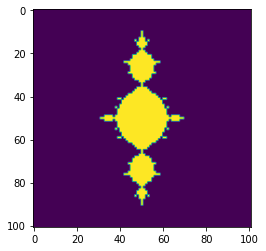

In [24]:
c = -1
z = 0 

# define an array 
max_iteration = 1000
threshold = 10
A = np.zeros(max_iteration, dtype=np.complex128)

r = np.linspace(-2, 2, 101)
i = np.linspace(-2, 2, 101)

def convergence(z):
    for index in range(max_iteration):
        f = z**2 + c
        A[index] = f
        z = f 
        if np.absolute(z) > threshold:
            return False
    return True     


convergence_array = np.zeros((101, 101))
for index_real in range(101):
    for index_imag in range(101):
        z = r[index_real] + 1j*i[index_imag]
        if convergence(z):
            convergence_array[index_real, index_imag] = 1
        

# make figure
fig = plt.figure()

# get the axes
ax = plt.axes()

# ax.scatter(np.real(A), np.imag(A))
ax.imshow(convergence_array)

plt.show()